# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [5]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [ ]:
env = UnityEnvironment(file_name='Reacher_one.exe')

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [ ]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [ ]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [3]:
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
torch.cuda.is_available()


True

In [ ]:
%load_ext autoreload
%autoreload 2
from ddpg_agent import Agent
def testFunction(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    agent = Agent(state_size=33, action_size=4, seed=0)
    epsilons = []
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0] 
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            # action = np.clip(action, -1, 1)
            env_info = env.step(action.astype(np.float32))[brain_name]  
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                    break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        epsilons.append(eps)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 10 == 0:
                print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)),end="")
                      
    print('\nEnvironment finished in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
    #torch.save(agent.actor_local.state_dict(), actor_pth)
    #torch.save(agent.critic_local.state_dict(), critic_pth)
    return scores, epsilons

In [ ]:
eps_start = 1.0
eps_end=0.01
eps_decay=0.99
n_episodes = 200
max_t = 1000

scores, epsi = testFunction(n_episodes, max_t, eps_start, eps_end, eps_decay)

In [11]:
scores = [0.4899999890476465, 0.6799999848008156, 0.46999998949468136, 0.7199999839067459, 1.289999971166253, 0.24999999441206455, 0.9199999794363976, 0.23999999463558197, 0.3799999915063381, 0.24999999441206455, 0.4599999897181988, 0.17999999597668648, 0.1699999962002039, 0.6899999845772982, 0.0, 0.5799999870359898, 0.1699999962002039, 1.3299999702721834, 0.3299999926239252, 1.3999999687075615, 1.1199999749660492, 0.47999998927116394, 1.0499999765306711, 0.8699999805539846, 1.1999999731779099, 1.3499999698251486, 0.4999999888241291, 1.269999971613288, 1.3699999693781137, 0.6899999845772982, 0.0, 0.9999999776482582, 1.5599999651312828, 0.8299999814480543, 0.42999999038875103, 2.0999999530613422, 2.579999942332506, 0.4499999899417162, 2.4299999456852674, 1.459999967366457, 2.819999936968088, 2.369999947026372, 0.4899999890476465, 3.7899999152868986, 2.5299999434500933, 2.109999952837825, 1.9499999564141035, 1.0699999760836363, 1.7499999608844519, 2.269999949261546, 2.0399999544024467, 1.099999975413084, 2.539999943226576, 3.1899999286979437, 1.7899999599903822, 4.029999909922481, 2.579999942332506, 3.0999999307096004, 2.6199999414384365, 1.8699999582022429, 4.109999908134341, 1.649999963119626, 3.279999926686287, 2.229999950155616, 3.1699999291449785, 3.9099999126046896, 2.819999936968088, 5.1099998857825994, 3.01999993249774, 5.129999885335565, 4.129999907687306, 4.489999899640679, 4.679999895393848, 3.229999927803874, 1.4499999675899744, 6.309999858960509, 3.899999912828207, 5.239999882876873, 4.449999900534749, 5.669999873265624, 4.5099998991936445, 4.2699999045580626, 5.0599998869001865, 4.379999902099371, 2.8599999360740185, 3.36999992467463, 3.129999930039048, 3.879999913275242, 0.2799999937415123, 4.089999908581376, 8.089999819174409, 7.179999839514494, 4.56999989785254, 2.059999953955412, 4.309999903663993, 2.799999937415123, 5.549999875947833, 1.8699999582022429, 3.799999915063381, 4.729999894276261, 6.799999848008156, 5.839999869465828, 4.229999905452132, 5.829999869689345, 3.5299999210983515, 5.509999876841903, 10.249999770894647, 2.939999934285879, 4.729999894276261, 4.899999890476465, 6.939999844878912, 4.719999894499779, 3.709999917075038, 4.21999990567565, 4.449999900534749, 4.769999893382192, 3.249999927356839, 6.849999846890569, 4.139999907463789, 5.999999865889549, 5.899999868124723, 10.579999763518572, 3.8699999134987593, 7.27999983727932, 5.369999879971147, 6.339999858289957, 3.689999917522073, 6.219999860972166, 5.449999878183007, 4.329999903216958, 6.989999843761325, 5.429999878630042, 9.359999790787697, 3.7899999152868986, 4.819999892264605, 5.219999883323908, 4.399999901652336, 8.389999812468886, 4.21999990567565, 6.689999850466847, 7.469999833032489, 4.999999888241291, 2.299999948590994, 7.479999832808971, 2.079999953508377, 6.069999864324927, 6.189999861642718, 6.4299998562783, 8.049999820068479, 6.159999862313271, 5.869999868795276, 4.769999893382192, 1.9299999568611383, 7.389999834820628, 5.529999876394868, 2.8099999371916056, 3.3899999242275953, 6.909999845549464, 20.40999954380095, 5.399999879300594, 6.589999852702022, 6.109999863430858, 3.2599999271333218, 4.899999890476465, 8.489999810233712, 8.419999811798334, 3.0699999313801527, 6.499999854713678, 8.90999980084598, 6.459999855607748, 2.0499999541789293, 3.9799999110400677, 6.369999857619405, 4.499999899417162, 8.739999804645777, 3.899999912828207, 7.249999837949872, 4.429999900981784, 5.319999881088734, 5.559999875724316, 7.7399998269975185, 7.5499998312443495, 4.889999890699983, 12.23999972641468, 10.319999769330025, 8.619999807327986, 8.779999803751707, 3.7399999164044857, 5.5399998761713505, 7.759999826550484, 8.139999818056822, 0.9399999789893627, 3.8399999141693115, 7.419999834150076, 6.199999861419201, 9.459999788552523, 6.73999984934926, 5.559999875724316, 5.339999880641699, 9.67999978363514, 7.039999842643738, 8.399999812245369, 4.779999893158674, 6.379999857395887, 7.689999828115106, 6.959999844431877, 8.939999800175428, 6.339999858289957, 5.629999874159694, 6.729999849572778, 9.129999795928597, 8.359999813139439, 7.729999827221036, 7.819999825209379, 5.49999987706542, 7.349999835714698, 6.379999857395887, 6.259999860078096, 6.319999858736992, 7.869999824091792, 6.769999848678708, 7.059999842196703, 9.009999798610806, 6.989999843761325, 9.549999786540866, 9.789999781176448, 8.32999981380999, 5.079999886453152, 9.249999793246388, 4.649999896064401, 3.609999919310212, 7.089999841526151, 0.29999999329447746, 8.90999980084598, 5.209999883547425, 7.389999834820628, 6.189999861642718, 9.48999978788197, 4.91999989002943, 5.6599998734891415, 5.399999879300594, 8.629999807104468, 8.929999800398946, 9.79999978095293, 7.479999832808971, 8.699999805539846, 7.179999839514494, 8.769999803975224, 4.179999906569719, 16.80999962426722, 9.21999979391694, 7.7899998258799314, 4.21999990567565, 9.429999789223075, 0.6499999854713678, 9.17999979481101, 5.319999881088734, 8.299999814480543, 8.509999809786677, 9.299999792128801, 14.55999967455864, 6.289999859407544, 6.73999984934926, 0.3399999924004078, 6.859999846667051, 8.049999820068479, 7.93999982252717, 3.9399999119341373, 1.3599999696016312, 7.109999841079116, 5.18999988399446, 5.8499998692423105, 8.069999819621444, 4.139999907463789, 5.49999987706542, 6.379999857395887, 16.91999962180853, 7.6699998285621405, 9.049999797716737, 7.409999834373593, 9.969999777153134, 6.9499998446553946, 10.279999770224094, 9.299999792128801, 8.759999804198742, 7.5499998312443495, 7.989999821409583, 7.599999830126762, 4.329999903216958, 2.1599999517202377, 6.34999985806644, 3.4599999226629734, 6.989999843761325, 5.0599998869001865, 11.589999740943313, 6.409999856725335, 6.2099998611956835, 7.239999838173389, 6.219999860972166, 5.379999879747629, 8.729999804869294, 6.849999846890569, 6.599999852478504, 7.169999839738011, 8.82999980263412, 5.7799998708069324, 9.269999792799354, 6.579999852925539, 9.289999792352319, 6.719999849796295, 6.789999848231673, 6.149999862536788, 8.199999816715717, 6.889999845996499, 5.80999987013638, 7.089999841526151, 9.669999783858657, 7.829999824985862, 6.859999846667051, 7.409999834373593, 11.819999735802412, 7.089999841526151, 5.829999869689345, 3.8099999148398638, 7.469999833032489, 8.2099998164922, 5.899999868124723, 2.74999993853271, 5.759999871253967, 10.059999775141478, 5.159999884665012, 6.869999846443534, 6.9499998446553946, 7.199999839067459, 7.93999982252717, 3.999999910593033, 8.549999808892608, 9.999999776482582, 8.179999817162752, 6.799999848008156, 5.22999988310039, 3.229999927803874, 5.49999987706542, 9.739999782294035, 7.819999825209379, 4.109999908134341, 4.029999909922481, 5.369999879971147, 6.07999986410141, 3.3099999260157347, 5.319999881088734, 8.499999810010195, 8.219999816268682, 4.279999904334545, 3.7899999152868986, 4.56999989785254, 5.869999868795276, 5.679999873042107, 4.179999906569719, 6.169999862089753, 6.669999850913882, 5.749999871477485, 9.169999795034528, 8.32999981380999, 5.869999868795276, 8.339999813586473, 6.189999861642718, 4.799999892711639, 3.01999993249774, 12.359999723732471, 7.459999833256006, 6.709999850019813, 10.14999977312982, 5.549999875947833, 7.079999841749668, 7.8599998243153095, 10.749999759718776, 6.229999860748649, 3.6999999172985554, 3.63999991863966, 10.129999773576856, 4.239999905228615, 4.249999905005097, 2.349999947473407, 9.009999798610806, 5.1799998842179775, 0.3499999921768904, 3.3199999257922173, 7.219999838620424, 3.0699999313801527, 6.719999849796295, 5.239999882876873, 5.689999872818589, 5.799999870359898, 6.96999984420836, 9.939999777823687, 7.27999983727932, 9.289999792352319, 4.789999892935157, 2.919999934732914, 6.269999859854579, 8.099999818950891, 6.029999865218997, 8.929999800398946, 9.469999788329005, 5.649999873712659, 6.769999848678708, 6.979999843984842, 7.909999823197722, 9.039999797940254, 8.729999804869294, 5.399999879300594, 5.0599998869001865, 7.689999828115106, 4.669999895617366, 7.349999835714698, 4.849999891594052, 24.449999453499913, 8.139999818056822, 27.83999937772751, 4.819999892264605, 5.5399998761713505, 9.459999788552523, 5.629999874159694, 5.549999875947833, 7.509999832138419, 7.299999836832285, 0.7399999834597111, 7.7899998258799314, 7.479999832808971, 7.929999822750688, 4.8799998909235, 7.399999834597111, 9.019999798387289, 6.609999852254987, 6.789999848231673, 5.949999867007136, 6.959999844431877, 12.349999723955989, 4.559999898076057, 3.8099999148398638, 11.529999742284417, 8.609999807551503, 9.469999788329005, 7.58999983035028, 6.189999861642718, 9.329999791458249, 6.359999857842922, 4.999999888241291, 4.599999897181988, 9.049999797716737, 7.949999822303653, 7.719999827444553, 7.169999839738011, 6.249999860301614, 13.699999693781137, 9.229999793693423, 7.399999834597111, 8.609999807551503, 12.54999971948564, 18.809999579563737, 5.829999869689345, 15.269999658688903, 8.109999818727374, 6.289999859407544, 7.0699998419731855, 9.909999778494239, 6.339999858289957, 9.36999979056418, 7.239999838173389, 5.079999886453152, 5.119999885559082, 7.079999841749668, 4.9399998895823956, 8.459999810904264, 7.239999838173389, 4.169999906793237, 5.219999883323908, 8.259999815374613, 9.589999785646796, 7.539999831467867, 8.099999818950891, 6.4299998562783, 7.519999831914902, 7.269999837502837, 7.339999835938215, 6.7599998489022255, 9.009999798610806, 0.6599999852478504, 7.829999824985862, 3.729999916628003, 8.849999802187085, 8.32999981380999, 9.289999792352319, 6.309999858960509, 3.8899999130517244, 5.239999882876873, 5.029999887570739, 5.859999869018793, 0.5899999868124723]


NameError: name 'epsi' is not defined

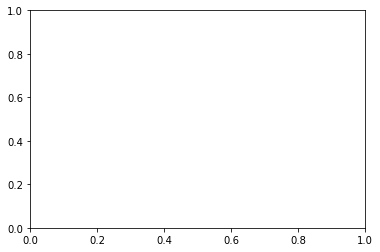

In [6]:
import pandas as pd
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), epsi,'b')
plt.ylabel('Epsilon')
plt.xlabel('Episode #')
plt.show()


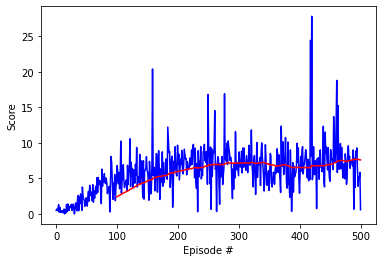

In [10]:
import pandas as pd
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores,'b')
rolling_mean = pd.Series(scores).rolling(100).mean()
plt.plot(np.arange(len(scores)), rolling_mean,'r')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
agent = Agent(state_size=37, action_size=4, seed=0, priority = True)
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state)       # select an action
    env_info = env.step(action.astype(np.float32))[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

In [ ]:
from a2cModel import A2CModel
from a2cModel import collect_trajectories, learn
#from IPython.core.debugger import set_trace
#set_trace()

from collections import deque
from workspace_utils import active_session

with active_session():
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(999)

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    agent_a2c = A2CModel().to(device)
    optimizer = optim.Adam(agent_a2c.parameters(), lr=0.00015)

    env_info = env.reset(train_mode=True)[brain_name] 
    states = env_info.vector_observations
    init_states = states

    n_episodes = 1
    n_steps = 10
    episode_end = False
    a2c_ep_rewards_list = []
    ep_rewards_deque = deque([0], maxlen=100) # initialize with 0
    ep_rewards = 0

    while True:
        batch_s, batch_a, batch_v_t, accu_rewards, init_states, episode_end = collect_trajectories(
            agent_a2c, env, brain_name, init_states, episode_end, n_steps)

        loss, mus, stds = learn(batch_s, batch_a, batch_v_t, agent_a2c, optimizer)
        ep_rewards += accu_rewards
        print('\rEpisode {:>4}\tEpisodic Score {:>7.3f}\tLoss {:>12.6f}'.format(
            n_episodes, np.mean(ep_rewards_deque), float(loss)), end="")

        if episode_end == True:
            if n_episodes % 100 == 0:
                print('\rEpisode {:>4}\tEpisodic Score {:>7.3f}\tLoss {:>12.6f}'.format(
                    n_episodes, np.mean(ep_rewards_deque), float(loss)))

            if np.mean(ep_rewards_deque) >= 34:
                break
            a2c_ep_rewards_list.append(ep_rewards/num_agents)
            ep_rewards_deque.append(ep_rewards/num_agents)
            ep_rewards = 0
            n_episodes += 1
            episode_end = False
            
    
    # save a2c model
    pth = './checkpoint/a2c_checkpoint.pth'
    torch.save(agent_a2c.state_dict(), pth)

    a2c_ep_rewards_list = np.array(a2c_ep_rewards_list)
    np.save('./data/a2c_ep_rewards_list.npy', a2c_ep_rewards_list)